In [42]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [4]:
#Fetch Images count from Folders

In [13]:
import os

count = 0
# Base directory where the folders are stored
base_dir = r'C:\Users\Niveditha\Downloads\flower recognition\Images'

# List all subdirectories in the base directory
dirs = os.listdir(base_dir)

for dir in dirs:
    # Create the full path to the subdirectory
    dir_path = os.path.join(base_dir, dir)
    
    # Check if it's a directory before proceeding
    if os.path.isdir(dir_path):
        # List all files in the subdirectory
        files = os.listdir(dir_path)
        
        # Print the number of files in the current subdirectory
        print(f'{dir} Folder has {len(files)} Images')
        
        # Update the total count of images
        count += len(files)

# Print the total number of images in the base directory
print(f'Images Folder Has {count} Images')


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder Has 4317 Images


In [14]:
#Load Images into Arrays as Dataset

In [15]:
base_dir = r'C:\Users\Niveditha\Downloads\flower recognition\Images'
img_size = 180
batch = 32

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training' ,
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation' ,
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [17]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [19]:
import matplotlib.pyplot as plt 

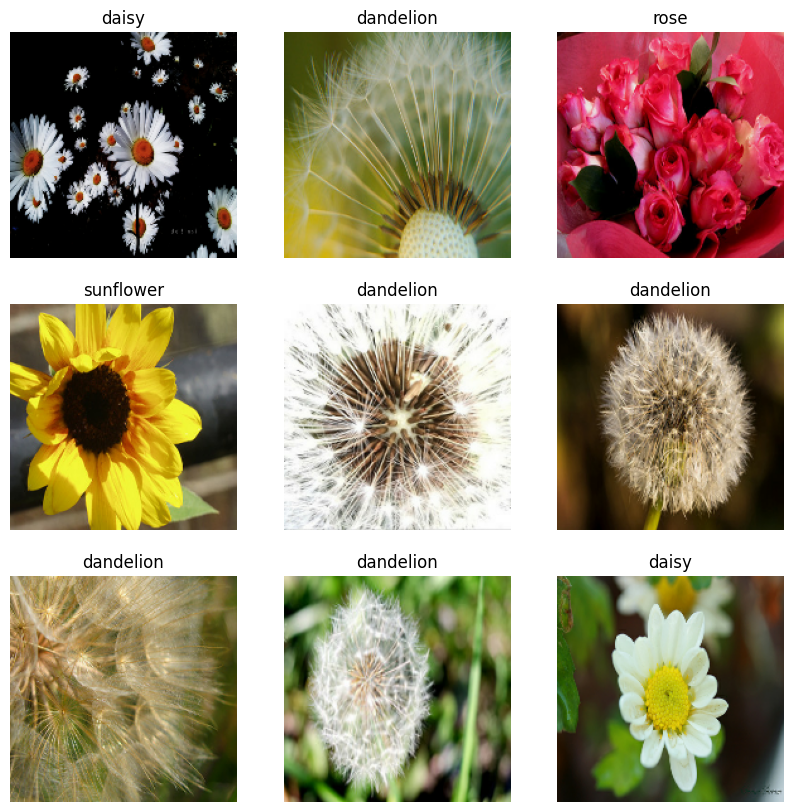

In [21]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')
    

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [25]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [26]:
#Data Augmentation

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation, RandomZoom

# Replace `img_size` with the appropriate size of your images
data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),  # Explicitly define the input shape (3 for RGB images)
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])


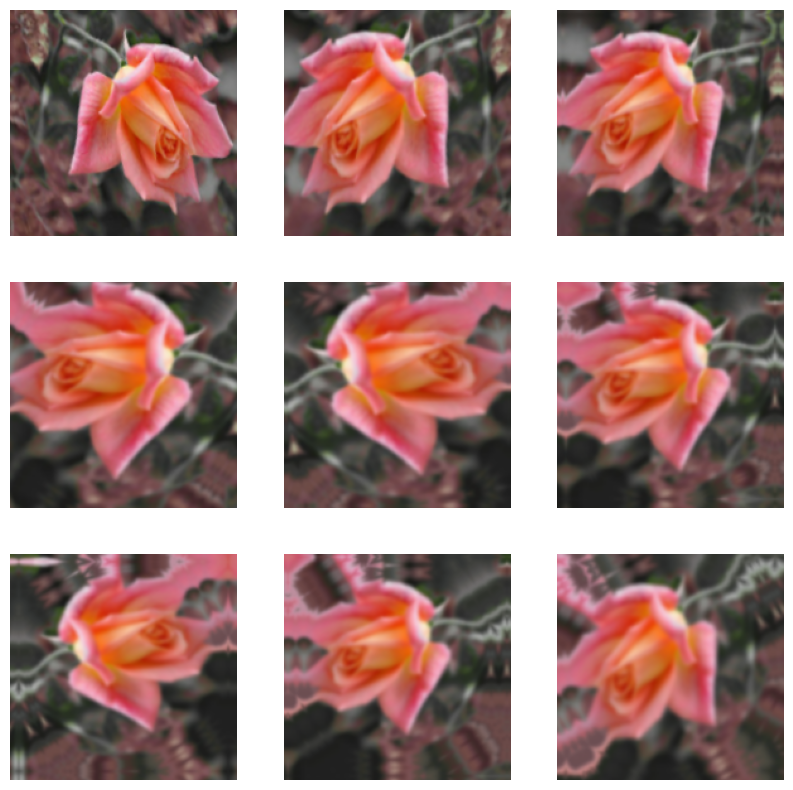

In [38]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [39]:
#Model Creation

In [43]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model.fit(train_ds, epochs=15,validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 99s 877ms/step - accuracy: 0.3675 - loss: 1.4385 - val_accuracy: 0.5701 - val_loss: 1.0931
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 771ms/step - accuracy: 0.5891 - loss: 1.0489 - val_accuracy: 0.6350 - val_loss: 0.9512
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 143s 778ms/step - accuracy: 0.6311 - loss: 0.9462 - val_accuracy: 0.6211 - val_loss: 0.9703
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 215s 862ms/step - accuracy: 0.6656 - loss: 0.8752 - val_accuracy: 0.6373 - val_loss: 0.9416
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 136s 798ms/step - accuracy: 0.6881 - loss: 0.8237 - val_accuracy: 0.6454 - val_loss: 0.9356
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 85s 791ms/step - accuracy: 0.6911 - loss: 0.7835 - val_accuracy: 0.6640 - val_loss: 0.8490
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 768ms/step - accuracy: 0.7023 - loss: 0.7834 - val_accuracy: 0.7149 - val_loss: 0.7894
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 774ms/step - accuracy: 0.7375 - loss

In [58]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path,target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result=tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [60]:
classify_images('Downloads/flower recognition/sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


'The Image belongs to rose with a score of 96.72213'

In [61]:
model.save('Flower_Recog_Model.h5')